# This is a notebook with blank cells for you to run through an example dataset cleaning/analysis
- There are multiple ways to do a lot of these steps!
- I have included hints/pointers as comments in a few of the steps, in case you get stuck
- Our goal will be to extract the large data from a csv file, clean it as necessary, and get some summary statistics

### This dataset was taken from the NCBI Gene Expression Omnibus [here](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE82187). It was originally published in 2016 [here](https://www.cell.com/cell-reports/fulltext/S2211-1247(16)30813-0?_returnURL=https%3A%2F%2Flinkinghub.elsevier.com%2Fretrieve%2Fpii%2FS2211124716308130%3Fshowall%3Dtrue) and was one of the first studies to perform scRNAseq on a large number of cell types in the striatum of adult mice (at least as far as I can tell).

### I have already downloaded and extracted the .csv linked at the bottom of the GEO page, and changed a few things within excel that we can now practice cleaning up. It can be downloaded [here](https://github.com/bdev1238/symmetrical-broccoli). You will need to download that file from github and extract it to work with it.

### This is a gene expression matrix from this study, that includes partially-processed RNAseq data. Each row represents a cell, whereas each column represents a specific gene. Given this information, the excel file is HUGE, making this a perfect application for python! It is much faster and easier to read this into a dataframe and manipulate it that way.

-

-

-

-

## (1) Start by importing the necessary packages at the top of the notebook, these are almost always numpy and pandas

In [8]:
import numpy as np
import pandas as pd

## (2) Next, you are going to want to read the data into a pandas dataframe, and assign that dataframe a master variable name

- Do not worry if it takes a second, this is a large dataset, so on my computer it takes about 30s to load in.

In [25]:
%%time

df = pd.read_csv('H:\\DATA\\rna_seq_datasets\\adult_striatum\\gocke2016_taxonomy_mouse_striatum_GSE82187.csv')

Wall time: 12.2 s


## (3) Print out the first 5 rows of the dataframe you've just created. How does it look? Are there any notable columns?
- How big is the dataframe? You can use shape function to see how many rows and columns it contains.
- Any columns that we might want to rename?
    - try to keep everything lowercase and use_dashes_instead_of_space
- Any columns we may want to drop for simplicity?

In [32]:
print(df.shape)
df.head(5)

(1208, 16380)


,cell_type,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,...,Xk,Xkr4,Xkr6,Xkr7,Xkr8,Xkrx,Xlr,Xlr3a,Xlr3b,Xlr3c
0,Neuron,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.715036,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,Neuron,0.0,1.828000,0.000000,0.0,1.751656,1.702620,0.000000,1.988706,1.795714,...,1.493253,0.000000,2.238984,0.0,0.000000,0.0,0.0,1.769819,0.0,0.0
2,Neuron,0.0,2.016060,0.000000,0.0,0.000000,2.047177,2.026682,1.426378,1.567832,...,0.000000,0.552569,0.939896,0.0,1.141321,0.0,0.0,0.000000,0.0,0.0
3,Neuron,0.0,2.547597,3.004959,0.0,0.000000,2.258460,0.000000,1.949213,1.184524,...,0.000000,0.000000,2.459365,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,Neuron,0.0,0.000000,0.000000,0.0,0.000000,1.727957,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.434977,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


## (4) Rename and drop any columns that you may want to. This is personal preference, but can help moving forward.
- Here are a few potential functions that are useful for this purpose
    - [df.rename](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html)
    - [df.drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)
- Reminder to reassign the outputs here to either the same df variable or a new variable! Also feel free to try out the "inplace" argument, see what it does!
   

In [27]:
df.rename(columns = {'type':'cell_type'}, inplace = True)
df.drop(columns = ['Unnamed: 0', 'cell.name', 'protocol', 'experiment'], inplace = True)

In [33]:
df.head()

,cell_type,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610009B22Rik,0610009D07Rik,...,Xk,Xkr4,Xkr6,Xkr7,Xkr8,Xkrx,Xlr,Xlr3a,Xlr3b,Xlr3c
0,Neuron,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.715036,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,Neuron,0.0,1.828000,0.000000,0.0,1.751656,1.702620,0.000000,1.988706,1.795714,...,1.493253,0.000000,2.238984,0.0,0.000000,0.0,0.0,1.769819,0.0,0.0
2,Neuron,0.0,2.016060,0.000000,0.0,0.000000,2.047177,2.026682,1.426378,1.567832,...,0.000000,0.552569,0.939896,0.0,1.141321,0.0,0.0,0.000000,0.0,0.0
3,Neuron,0.0,2.547597,3.004959,0.0,0.000000,2.258460,0.000000,1.949213,1.184524,...,0.000000,0.000000,2.459365,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,Neuron,0.0,0.000000,0.000000,0.0,0.000000,1.727957,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.434977,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0


## (5) Now that we have adequately cleaned columns, let's explore some of this data! We will probably want to sort by cell type, which is contained in one of the columns.
- There are a couple ways to do this:
    - One being the [sort_values function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)
        - Try this one first!
    - Another being the [groupby function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)
        - This one will come in a little bit later, but can be used at this step

In [34]:
df.sort_values(by = 'cell_type', inplace = True)

## (6) Get the [value_counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) of the different cell types contained in this dataset.
- This will require indexing just the cell type column to pass that series to this function!

In [37]:
df['cell_type'].value_counts()

Neuron             836
Astro              106
Macrophage          71
Microglia           48
Vascular            43
Oligo               42
Ependy-Sec          21
Ependy-C            18
OPC                 13
NSC                  7
neuron               1
Oligodendrocyte      1
Astrocyte            1
Name: cell_type, dtype: int64

## (7) Hmmm. It seems that a few cell types are overlapping? Maybe they were misnamed? (I did this don't worry). We should rename those!!
- I believe it is for-loop time!
- Again, there are many ways to do this, but try to write the code in such a way that it is generalizable to any future datasets!

In [38]:
for i in range(len(df)):
    if df['cell_type'][i] == 'neuron':
        df['cell_type'][i] = 'Neuron'
    if df['cell_type'][i] == 'Oligodendrocyte':
        df['cell_type'][i] = 'Oligo'
    if df['cell_type'][i] == 'Astrocyte':
        df['cell_type'][i] = 'Astro'

D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


## (8) Reprint the value counts to check whether you effectively removed the few stragglers!
- There should be 10 different types, you can quickly check this using np.unique().shape() on original cell type series!

In [78]:
print(df['cell_type'].value_counts())
print('Number of unique classification of cell type: ', np.unique(df['cell_type']).shape)

Neuron        837
Astro         107
Macrophage     71
Microglia      48
Oligo          43
Vascular       43
Ependy-Sec     21
Ependy-C       18
OPC            13
NSC             7
Name: cell_type, dtype: int64
Number of unique classification of cell type:  (10,)


## (9) Now that we have fixed the abberrant labels, we can appropriately group the data!!
- Our first question could be: what is the average (mean) gene expression of Shank3 in different cell types within the striatum?
    - Write a code (using the pandas groupby function) to answer this question

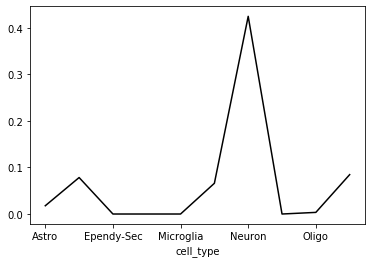

In [62]:
df.groupby(['cell_type'])['Shank3'].mean().plot(color = 'black');

## We can repeat this code with any gene we might be interested in! Let's try Cx3cr1!

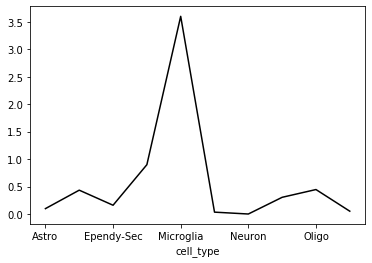

In [63]:
df.groupby(['cell_type'])['Cx3cr1'].mean().plot(color = 'black');

## (10) A quick way to visualize these quantities across groups is to plot them. Try appending the .plot() function onto the end of your groupby code and see what happens!
- In the publication, they distinguished various cell types based on their uniquely high expression of certain genes.
    - Which cell type are they able to distinguish using 'Ttr'?
    - What about 'Mog'?

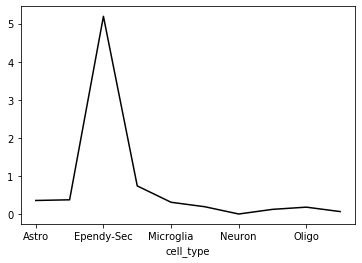

In [69]:
df.groupby(['cell_type'])['Ttr'].mean().plot(color = 'black');

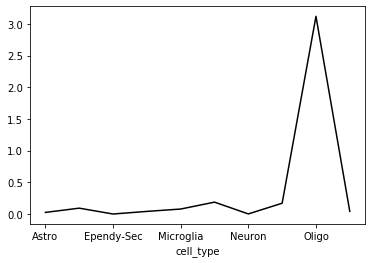

In [70]:
df.groupby(['cell_type'])['Mog'].mean().plot(color = 'black');

## (11) Hopefully this was helpful to work through and this example was able to demonstrate how getting your data to a clean dataframe format can allow for fast, exploratory analysis in many different dimensions!
- Please slack or bring any questions with you to our programming meeting next week!